In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import statsmodels.formula.api as sm
import scipy.stats as stats
import pandas_profiling   #need to install using anaconda prompt (pip install pandas_profiling)

%matplotlib inline
plt.rcParams['figure.figsize'] = 10, 7.5
plt.rcParams['axes.grid'] = True
plt.gray()

from matplotlib.backends.backend_pdf import PdfPages

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from patsy import dmatrices

<Figure size 720x540 with 0 Axes>

In [2]:
data_train = pd.read_csv('E:/Data Science Material/AssignmentToSubmit/Supervised 1/LR/NSL_Dataset/Train.txt',sep=",",header=None,names=["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment", "Urgent", "Hot", "Num_failed_logins", "Logged_inLoginStatus", "Num_compromised", "Root_shell", "Su_attempted", "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login", "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate", "Dst_host_srv_rerror_rate", "Attack", "Last_flag"])

In [3]:
data_test = pd.read_csv('E:/Data Science Material/AssignmentToSubmit/Supervised 1/LR/NSL_Dataset/Test.txt',sep=",",header=None,names=["Duration", "Protocol_type", "Service", "Flag", "Src_bytes", "Dst_bytes", "Land", "Wrong_fragment", "Urgent", "Hot", "Num_failed_logins", "Logged_inLoginStatus", "Num_compromised", "Root_shell", "Su_attempted", "Num_root", "Num_file_creations", "Num_shells", "Num_access_files", "Num_outbound_cmds", "Is_hot_login", "Is_guest_login", "Count", "Srv_count", "Serror_rate", "Srv_serror_rate", "Rerror_rate", "Srv_rerror_rate", "Same_srv_rate", "Diff_srv_rate", "Srv_diff_host_rate", "Dst_host_count", "Dst_host_srv_count", "Dst_host_same_srv_rate", "Dst_host_diff_srv_rate", "Dst_host_same_src_port_rate", "Dst_host_srv_diff_host_rate", "Dst_host_serror_rate", "Dst_host_srv_serror_rate", "Dst_host_rerror_rate", "Dst_host_srv_rerror_rate", "Attack", "Last_flag"])

In [4]:
data_train.head()

Duration Protocol_type   Service Flag  Src_bytes  Dst_bytes  Land  \
0         0           tcp  ftp_data   SF        491          0     0   
1         0           udp     other   SF        146          0     0   
2         0           tcp   private   S0          0          0     0   
3         0           tcp      http   SF        232       8153     0   
4         0           tcp      http   SF        199        420     0   

   Wrong_fragment  Urgent  Hot    ...      Dst_host_same_srv_rate  \
0               0       0    0    ...                        0.17   
1               0       0    0    ...                        0.00   
2               0       0    0    ...                        0.10   
3               0       0    0    ...                        1.00   
4               0       0    0    ...                        1.00   

   Dst_host_diff_srv_rate  Dst_host_same_src_port_rate  \
0                    0.03                         0.17   
1                    0.60                         0.88   
2                    0.05                         0.00   
3                    0.00                         0.03   
4                    0.00                         0.00   

   Dst_host_srv_diff_host_rate  Dst_host_serror_rate  \
0                         0.00                  0.00   
1                         0.00                  0.00   
2                         0.00                  1.00   
3                         0.04                  0.03   
4                         0.00                  0.00   

   Dst_host_srv_serror_rate  Dst_host_rerror_rate  Dst_host_srv_rerror_rate  \
0                      0.00                  0.05                      0.00   
1                      0.00                  0.00                      0.00   
2                      1.00                  0.00                      0.00   
3                      0.01                  0.00                      0.01   
4                      0.00                  0.00                      0.00   

    Attack  Last_flag  
0   normal         20  
1   normal         15  
2  neptune         19  
3   normal         21  
4   normal         21  

[5 rows x 43 columns]

In [5]:
data_test.head()

Duration Protocol_type   Service  Flag  Src_bytes  Dst_bytes  Land  \
0         0           tcp   private   REJ          0          0     0   
1         0           tcp   private   REJ          0          0     0   
2         2           tcp  ftp_data    SF      12983          0     0   
3         0          icmp     eco_i    SF         20          0     0   
4         1           tcp    telnet  RSTO          0         15     0   

   Wrong_fragment  Urgent  Hot    ...      Dst_host_same_srv_rate  \
0               0       0    0    ...                        0.04   
1               0       0    0    ...                        0.00   
2               0       0    0    ...                        0.61   
3               0       0    0    ...                        1.00   
4               0       0    0    ...                        0.31   

   Dst_host_diff_srv_rate  Dst_host_same_src_port_rate  \
0                    0.06                         0.00   
1                    0.06                         0.00   
2                    0.04                         0.61   
3                    0.00                         1.00   
4                    0.17                         0.03   

   Dst_host_srv_diff_host_rate  Dst_host_serror_rate  \
0                         0.00                   0.0   
1                         0.00                   0.0   
2                         0.02                   0.0   
3                         0.28                   0.0   
4                         0.02                   0.0   

   Dst_host_srv_serror_rate  Dst_host_rerror_rate  Dst_host_srv_rerror_rate  \
0                       0.0                  1.00                      1.00   
1                       0.0                  1.00                      1.00   
2                       0.0                  0.00                      0.00   
3                       0.0                  0.00                      0.00   
4                       0.0                  0.83                      0.71   

    Attack  Last_flag  
0  neptune         21  
1  neptune         21  
2   normal         21  
3    saint         15  
4    mscan         11  

[5 rows x 43 columns]

In [6]:
data_train['Split'] = 'Train'
data_test['Split'] = 'Test'

In [7]:
data = pd.concat([data_train, data_test], axis=0)

In [8]:
data.to_csv("E:/Data Science Material/AssignmentToSubmit/Supervised 1/LR/NSL_Dataset/TrainFormatted.csv")

In [9]:
data.shape

(148517, 44)

In [12]:
pandas_profiling.ProfileReport(data)

In [10]:
numeric_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['float64', 'int64', 'float32', 'int32']]
cat_var_names=[key for key in dict(data.dtypes) if dict(data.dtypes)[key] in ['object']]
print(numeric_var_names)
print(cat_var_names)

['Duration', 'Src_bytes', 'Dst_bytes', 'Land', 'Wrong_fragment', 'Urgent', 'Hot', 'Num_failed_logins', 'Logged_inLoginStatus', 'Num_compromised', 'Root_shell', 'Su_attempted', 'Num_root', 'Num_file_creations', 'Num_shells', 'Num_access_files', 'Num_outbound_cmds', 'Is_hot_login', 'Is_guest_login', 'Count', 'Srv_count', 'Serror_rate', 'Srv_serror_rate', 'Rerror_rate', 'Srv_rerror_rate', 'Same_srv_rate', 'Diff_srv_rate', 'Srv_diff_host_rate', 'Dst_host_count', 'Dst_host_srv_count', 'Dst_host_same_srv_rate', 'Dst_host_diff_srv_rate', 'Dst_host_same_src_port_rate', 'Dst_host_srv_diff_host_rate', 'Dst_host_serror_rate', 'Dst_host_srv_serror_rate', 'Dst_host_rerror_rate', 'Dst_host_srv_rerror_rate', 'Last_flag']
['Protocol_type', 'Service', 'Flag', 'Attack', 'Split']


In [11]:
data_num=data[numeric_var_names]
data_num.head(5)

Duration  Src_bytes  Dst_bytes  Land  Wrong_fragment  Urgent  Hot  \
0         0        491          0     0               0       0    0   
1         0        146          0     0               0       0    0   
2         0          0          0     0               0       0    0   
3         0        232       8153     0               0       0    0   
4         0        199        420     0               0       0    0   

   Num_failed_logins  Logged_inLoginStatus  Num_compromised    ...      \
0                  0                     0                0    ...       
1                  0                     0                0    ...       
2                  0                     0                0    ...       
3                  0                     1                0    ...       
4                  0                     1                0    ...       

   Dst_host_srv_count  Dst_host_same_srv_rate  Dst_host_diff_srv_rate  \
0                  25                    0.17                    0.03   
1                   1                    0.00                    0.60   
2                  26                    0.10                    0.05   
3                 255                    1.00                    0.00   
4                 255                    1.00                    0.00   

   Dst_host_same_src_port_rate  Dst_host_srv_diff_host_rate  \
0                         0.17                         0.00   
1                         0.88                         0.00   
2                         0.00                         0.00   
3                         0.03                         0.04   
4                         0.00                         0.00   

   Dst_host_serror_rate  Dst_host_srv_serror_rate  Dst_host_rerror_rate  \
0                  0.00                      0.00                  0.05   
1                  0.00                      0.00                  0.00   
2                  1.00                      1.00                  0.00   
3                  0.03                      0.01                  0.00   
4                  0.00                      0.00                  0.00   

   Dst_host_srv_rerror_rate  Last_flag  
0                      0.00         20  
1                      0.00         15  
2                      0.00         19  
3                      0.01         21  
4                      0.00         21  

[5 rows x 39 columns]

In [12]:
data_cat = data[cat_var_names]
data_cat.head(5)
#data_cat[data_cat.Attack.isnull()==1]

Protocol_type   Service Flag   Attack  Split
0           tcp  ftp_data   SF   normal  Train
1           udp     other   SF   normal  Train
2           tcp   private   S0  neptune  Train
3           tcp      http   SF   normal  Train
4           tcp      http   SF   normal  Train

In [13]:
# Creating Data audit Report
# Use a general function that returns multiple values
def var_summary(x):
    return pd.Series([x.count(), x.isnull().sum(), x.sum(), x.mean(), x.median(),  x.std(), x.var(), x.min(), x.dropna().quantile(0.01), x.dropna().quantile(0.05),x.dropna().quantile(0.10),x.dropna().quantile(0.25),x.dropna().quantile(0.50),x.dropna().quantile(0.75), x.dropna().quantile(0.90),x.dropna().quantile(0.95), x.dropna().quantile(0.99),x.max()], 
                  index=['N', 'NMISS', 'SUM', 'MEAN','MEDIAN', 'STD', 'VAR', 'MIN', 'P1' , 'P5' ,'P10' ,'P25' ,'P50' ,'P75' ,'P90' ,'P95' ,'P99' ,'MAX'])

num_summary=data_num.apply(lambda x: var_summary(x)).T

In [14]:
num_summary

N  NMISS           SUM          MEAN  \
Duration                     148517.0    0.0  4.110643e+07    276.779305   
Src_bytes                    148517.0    0.0  5.974534e+09  40227.949299   
Dst_bytes                    148517.0    0.0  2.537985e+09  17088.853593   
Land                         148517.0    0.0  3.200000e+01      0.000215   
Wrong_fragment               148517.0    0.0  3.048000e+03      0.020523   
Urgent                       148517.0    0.0  3.000000e+01      0.000202   
Hot                          148517.0    0.0  2.812600e+04      0.189379   
Num_failed_logins            148517.0    0.0  6.420000e+02      0.004323   
Logged_inLoginStatus         148517.0    0.0  5.982100e+04      0.402789   
Num_compromised              148517.0    0.0  3.788100e+04      0.255062   
Root_shell                   148517.0    0.0  2.240000e+02      0.001508   
Su_attempted                 148517.0    0.0  1.450000e+02      0.000976   
Num_root                     148517.0    0.0  4.065300e+04      0.273726   
Num_file_creations           148517.0    0.0  1.793000e+03      0.012073   
Num_shells                   148517.0    0.0  7.800000e+01      0.000525   
Num_access_files             148517.0    0.0  5.960000e+02      0.004013   
Num_outbound_cmds            148517.0    0.0  0.000000e+00      0.000000   
Is_hot_login                 148517.0    0.0  1.200000e+01      0.000081   
Is_guest_login               148517.0    0.0  1.828000e+03      0.012308   
Count                        148517.0    0.0  1.237690e+07     83.336561   
Srv_count                    148517.0    0.0  4.195893e+06     28.251937   
Serror_rate                  148517.0    0.0  3.815768e+04      0.256925   
Srv_serror_rate              148517.0    0.0  3.792188e+04      0.255337   
Rerror_rate                  148517.0    0.0  2.048744e+04      0.137947   
Srv_rerror_rate              148517.0    0.0  2.056769e+04      0.138487   
Same_srv_rate                148517.0    0.0  9.994937e+04      0.672983   
Diff_srv_rate                148517.0    0.0  1.006373e+04      0.067761   
Srv_diff_host_rate           148517.0    0.0  1.447170e+04      0.097441   
Dst_host_count               148517.0    0.0  2.731644e+07    183.928042   
Dst_host_srv_count           148517.0    0.0  1.774224e+07    119.462661   
Dst_host_same_srv_rate       148517.0    0.0  7.938540e+04      0.534521   
Dst_host_diff_srv_rate       148517.0    0.0  1.249073e+04      0.084103   
Dst_host_same_src_port_rate  148517.0    0.0  2.167342e+04      0.145932   
Dst_host_srv_diff_host_rate  148517.0    0.0  4.542200e+03      0.030584   
Dst_host_serror_rate         148517.0    0.0  3.803844e+04      0.256122   
Dst_host_srv_serror_rate     148517.0    0.0  3.732299e+04      0.251304   
Dst_host_rerror_rate         148517.0    0.0  2.023103e+04      0.136220   
Dst_host_srv_rerror_rate     148517.0    0.0  2.025732e+04      0.136397   
Last_flag                    148517.0    0.0  2.863182e+06     19.278480   

                             MEDIAN           STD           VAR  MIN   P1  \
Duration                       0.00  2.460683e+03  6.054961e+06  0.0  0.0   
Src_bytes                     44.00  5.409612e+06  2.926390e+13  0.0  0.0   
Dst_bytes                      0.00  3.703525e+06  1.371610e+13  0.0  0.0   
Land                           0.00  1.467714e-02  2.154186e-04  0.0  0.0   
Wrong_fragment                 0.00  2.400691e-01  5.763316e-02  0.0  0.0   
Urgent                         0.00  1.941708e-02  3.770229e-04  0.0  0.0   
Hot                            0.00  2.013160e+00  4.052813e+00  0.0  0.0   
Num_failed_logins              0.00  7.224823e-02  5.219807e-03  0.0  0.0   
Logged_inLoginStatus           0.00  4.904606e-01  2.405516e-01  0.0  0.0   
Num_compromised                0.00  2.223137e+01  4.942340e+02  0.0  0.0   
Root_shell                     0.00  3.880696e-02  1.505980e-03  0.0  0.0   
Su_attempted                   0.00  4.238907e-02  1.796833e-03  0.0  0

In [15]:
#Handling Outliers - Method2
def outlier_capping(x):
    x = x.clip_upper(x.quantile(0.99))
    x = x.clip_lower(x.quantile(0.01))
    return x

data_num=data_num.apply(lambda x: outlier_capping(x))

In [16]:
#Handling missings - Method2
def Missing_imputation(x):
    x = x.fillna(x.median())
    return x

data_num=data_num.apply(lambda x: Missing_imputation(x))

In [20]:
pandas_profiling.ProfileReport(data_num)

In [17]:
data_num.corr()

Duration  Src_bytes  Dst_bytes  Land  \
Duration                     1.000000   0.031754   0.022298   NaN   
Src_bytes                    0.031754   1.000000   0.113106   NaN   
Dst_bytes                    0.022298   0.113106   1.000000   NaN   
Land                              NaN        NaN        NaN   NaN   
Wrong_fragment                    NaN        NaN        NaN   NaN   
Urgent                            NaN        NaN        NaN   NaN   
Hot                          0.014879   0.428118   0.145471   NaN   
Num_failed_logins                 NaN        NaN        NaN   NaN   
Logged_inLoginStatus        -0.070226   0.156236   0.417963   NaN   
Num_compromised              0.048040   0.559997   0.239904   NaN   
Root_shell                        NaN        NaN        NaN   NaN   
Su_attempted                      NaN        NaN        NaN   NaN   
Num_root                          NaN        NaN        NaN   NaN   
Num_file_creations                NaN        NaN        NaN   NaN   
Num_shells                        NaN        NaN        NaN   NaN   
Num_access_files                  NaN        NaN        NaN   NaN   
Num_outbound_cmds                 NaN        NaN        NaN   NaN   
Is_hot_login                      NaN        NaN        NaN   NaN   
Is_guest_login               0.008038  -0.009997   0.012610   NaN   
Count                       -0.102243  -0.107363  -0.231851   NaN   
Srv_count                   -0.051021  -0.032763  -0.086668   NaN   
Serror_rate                 -0.083555  -0.100523  -0.189932   NaN   
Srv_serror_rate             -0.083263  -0.099878  -0.190382   NaN   
Rerror_rate                  0.125683   0.009543  -0.131516   NaN   
Srv_rerror_rate              0.127489   0.016451  -0.127387   NaN   
Same_srv_rate                0.091658   0.127765   0.262829   NaN   
Diff_srv_rate               -0.008859  -0.046219  -0.114219   NaN   
Srv_diff_host_rate          -0.051223  -0.001705   0.013273   NaN   
Dst_host_count               0.061849  -0.046311  -0.210438   NaN   
Dst_host_srv_count          -0.107915   0.033591   0.317997   NaN   
Dst_host_same_srv_rate      -0.113867   0.093893   0.306408   NaN   
Dst_host_diff_srv_rate       0.270154  -0.044369  -0.131252   NaN   
Dst_host_same_src_port_rate  0.221647   0.021613  -0.080717   NaN   
Dst_host_srv_diff_host_rate -0.036447  -0.019078  -0.012170   NaN   
Dst_host_serror_rate        -0.059325  -0.101558  -0.196683   NaN   
Dst_host_srv_serror_rate    -0.056301  -0.101301  -0.196226   NaN   
Dst_host_rerror_rate         0.111334  -0.035046  -0.134480   NaN   
Dst_host_srv_rerror_rate     0.120953  -0.037100  -0.123716   NaN   
Last_flag                   -0.131791  -0.246125   0.097641   NaN   

                             Wrong_fragment  Urgent       Hot  \
Duration                                NaN     NaN  0.014879   
Src_bytes                               NaN     NaN  0.428118   
Dst_bytes                               NaN     NaN  0.145471   
Land                                    NaN     NaN       NaN   
Wrong_fragment                          NaN     NaN       NaN   
Urgent                                  NaN     NaN       NaN   
Hot                                     NaN     NaN  1.000000   
Num_failed_logins                       NaN     NaN       NaN   
Logged_inLoginStatus                    NaN     NaN  0.183832   
Num_compromised                         NaN     NaN  0.548446   
Root_shell                              NaN     NaN       NaN   
Su_attempted                            NaN     NaN       NaN   
Num_root                                NaN     NaN       NaN   
Num_file_creations                      NaN     NaN       NaN   
Num_shells                              NaN     NaN       NaN   
Num_access_files                        NaN     NaN       NaN   
Num_outbound_cmds                       NaN     NaN       NaN   
Is_hot_login                            NaN     NaN       NaN   
Is_guest_login                   

Dropping variables based on low or no variance in data (constant values)

In [18]:
data_num.drop(['Wrong_fragment','Urgent','Su_attempted','Root_shell','Num_shells','Num_root','Num_outbound_cmds','Num_file_creations','Num_failed_logins','Num_access_files','Land','Is_hot_login','Is_guest_login'], axis=1, inplace=True)
#data_num.drop(['ln_Dst_bytes'],axis=1,inplace=True)

In [23]:
pandas_profiling.ProfileReport(data_num)

Dropping variables based on high coorelation with each other

In [19]:
data_num.drop(['Serror_rate','Rerror_rate'],axis=1,inplace=True)

In [20]:
data_num.drop(['Srv_rerror_rate','Srv_serror_rate'],axis=1,inplace=True)

In [21]:
data_num.drop(['Dst_host_srv_rerror_rate','Dst_host_srv_serror_rate'],axis=1,inplace=True)

In [21]:
pandas_profiling.ProfileReport(data_num)

In [22]:
categorical_features = ['Protocol_type','Service','Flag']

In [23]:
# An utility function to create dummy variable
def create_dummies( df, colname ):
    col_dummies = pd.get_dummies(df[colname], prefix=colname)
    col_dummies.drop(col_dummies.columns[0], axis=1, inplace=True)
    df = pd.concat([df, col_dummies], axis=1)
    df.drop( colname, axis = 1, inplace = True )
    return df

In [24]:
for c_feature in categorical_features:
    data_cat = create_dummies( data_cat, c_feature )

In [25]:
#data_cat.drop(['Attack'],axis=1,inplace=True)
data_cat.head()

Attack  Split  Protocol_type_tcp  Protocol_type_udp  Service_X11  \
0   normal  Train                  1                  0            0   
1   normal  Train                  0                  1            0   
2  neptune  Train                  1                  0            0   
3   normal  Train                  1                  0            0   
4   normal  Train                  1                  0            0   

   Service_Z39_50  Service_aol  Service_auth  Service_bgp  Service_courier  \
0               0            0             0            0                0   
1               0            0             0            0                0   
2               0            0             0            0                0   
3               0            0             0            0                0   
4               0            0             0            0                0   

    ...     Flag_REJ  Flag_RSTO  Flag_RSTOS0  Flag_RSTR  Flag_S0  Flag_S1  \
0   ...            0          0            0          0        0        0   
1   ...            0          0            0          0        0        0   
2   ...            0          0            0          0        1        0   
3   ...            0          0            0          0        0        0   
4   ...            0          0            0          0        0        0   

   Flag_S2  Flag_S3  Flag_SF  Flag_SH  
0        0        0        1        0  
1        0        0        1        0  
2        0        0        0        0  
3        0        0        1        0  
4        0        0        1        0  

[5 rows x 83 columns]

In [26]:
def dependentVar(attackType):
    if attackType=='normal':
        return 0
    else:
        return 1

In [27]:
data_cat['AttackSegmented'] = data_cat['Attack'].apply(dependentVar)

In [28]:
data_cat.drop(['Attack'],axis=1,inplace=True)

In [29]:
data_cat.head()

Split  Protocol_type_tcp  Protocol_type_udp  Service_X11  Service_Z39_50  \
0  Train                  1                  0            0               0   
1  Train                  0                  1            0               0   
2  Train                  1                  0            0               0   
3  Train                  1                  0            0               0   
4  Train                  1                  0            0               0   

   Service_aol  Service_auth  Service_bgp  Service_courier  Service_csnet_ns  \
0            0             0            0                0                 0   
1            0             0            0                0                 0   
2            0             0            0                0                 0   
3            0             0            0                0                 0   
4            0             0            0                0                 0   

        ...         Flag_RSTO  Flag_RSTOS0  Flag_RSTR  Flag_S0  Flag_S1  \
0       ...                 0            0          0        0        0   
1       ...                 0            0          0        0        0   
2       ...                 0            0          0        1        0   
3       ...                 0            0          0        0        0   
4       ...                 0            0          0        0        0   

   Flag_S2  Flag_S3  Flag_SF  Flag_SH  AttackSegmented  
0        0        0        1        0                0  
1        0        0        1        0                0  
2        0        0        0        0                1  
3        0        0        1        0                0  
4        0        0        1        0                0  

[5 rows x 83 columns]

In [30]:
data_new = pd.concat([data_num, data_cat], axis=1)
data_new.head()

Duration  Src_bytes  Dst_bytes  Hot  Logged_inLoginStatus  Num_compromised  \
0       0.0      491.0        0.0  0.0                   0.0              0.0   
1       0.0      146.0        0.0  0.0                   0.0              0.0   
2       0.0        0.0        0.0  0.0                   0.0              0.0   
3       0.0      232.0     8153.0  0.0                   1.0              0.0   
4       0.0      199.0      420.0  0.0                   1.0              0.0   

   Count  Srv_count  Same_srv_rate  Diff_srv_rate       ...         Flag_RSTO  \
0    2.0        2.0           1.00           0.00       ...                 0   
1   13.0        1.0           0.08           0.15       ...                 0   
2  123.0        6.0           0.05           0.07       ...                 0   
3    5.0        5.0           1.00           0.00       ...                 0   
4   30.0       32.0           1.00           0.00       ...                 0   

   Flag_RSTOS0  Flag_RSTR  Flag_S0  Flag_S1  Flag_S2  Flag_S3  Flag_SF  \
0            0          0        0        0        0        0        1   
1            0          0        0        0        0        0        1   
2            0          0        1        0        0        0        0   
3            0          0        0        0        0        0        1   
4            0          0        0        0        0        0        1   

   Flag_SH  AttackSegmented  
0        0                0  
1        0                0  
2        0                1  
3        0                0  
4        0                0  

[5 rows x 103 columns]

In [32]:
pandas_profiling.ProfileReport(data_new)

In [31]:
data_new = data_new.drop_duplicates()

In [37]:
pandas_profiling.ProfileReport(data_new)

### Variable Reduction using Somer's D values

In [32]:
somersd_df = pd.DataFrame()
for num_variable in data_new.columns.difference(['AttackSegmented']):
    logreg = sm.logit(formula = str('AttackSegmented ~ ')+str(num_variable), data=data_new)
    result = logreg.fit(method='bfgs')
    #summ = result.summary2()
    y_score = pd.DataFrame(result.predict())
    y_score.columns = ['Score']
    somers_d = 2*metrics.roc_auc_score(data_new['AttackSegmented'],y_score) - 1
    temp = pd.DataFrame([num_variable,somers_d]).T
    temp.columns = ['Variable Name', 'SomersD']
    somersd_df = pd.concat([somersd_df, temp], axis=0)

somersd_df

Optimization terminated successfully.
         Current function value: 0.514055
         Iterations: 11
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.666252
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15


C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: 0.601123
         Iterations: 12
         Function evaluations: 25
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.619536
         Iterations: 12
         Function evaluations: 15
         Gradient evaluations: 15
Optimization terminated successfully.
         Current function value: 0.661440
         Iterations: 15
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.646117
         Iterations: 10
         Function evaluations: 12
         Gradient evaluations: 12
Optimization terminated successfully.
         Current function value: 0.689430
         Iterations: 12
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.448098
         Iterations: 12
         Function evaluations: 13
  

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\base\model.py:508: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


Optimization terminated successfully.
         Current function value: 0.665041
         Iterations: 11
         Function evaluations: 13
         Gradient evaluations: 13
Optimization terminated successfully.
         Current function value: 0.685327
         Iterations: 17
         Function evaluations: 18
         Gradient evaluations: 18
Optimization terminated successfully.
         Current function value: 0.691596
         Iterations: 17
         Function evaluations: 21
         Gradient evaluations: 21
Optimization terminated successfully.
         Current function value: 0.684471
         Iterations: 18
         Function evaluations: 19
         Gradient evaluations: 19
Optimization terminated successfully.
         Current function value: 0.474256
         Iterations: 14
         Function evaluations: 16
         Gradient evaluations: 16
Optimization terminated successfully.
         Current function value: 0.690783
         Iterations: 16
         Function evaluations: 19
  

Optimization terminated successfully.
         Current function value: 0.689921
         Iterations: 24
         Function evaluations: 27
         Gradient evaluations: 27
Optimization terminated successfully.
         Current function value: 0.689531
         Iterations: 20
         Function evaluations: 23
         Gradient evaluations: 23
Optimization terminated successfully.
         Current function value: 0.689775
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.689709
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.689623
         Iterations: 23
         Function evaluations: 26
         Gradient evaluations: 26
Optimization terminated successfully.
         Current function value: 0.689916
         Iterations: 24
         Function evaluations: 27
  

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))
C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\discrete\discrete_model.py:1724: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


Optimization terminated successfully.
         Current function value: 0.691196
         Iterations: 7
         Function evaluations: 22
         Gradient evaluations: 11
Optimization terminated successfully.
         Current function value: 0.692011
         Iterations: 7
         Function evaluations: 10
         Gradient evaluations: 10
Optimization terminated successfully.
         Current function value: 0.685754
         Iterations: 13
         Function evaluations: 14
         Gradient evaluations: 14


Variable Name      SomersD
0                         Count     0.570617
0                 Diff_srv_rate     0.651252
0                     Dst_bytes     0.785733
0                Dst_host_count     0.404632
0        Dst_host_diff_srv_rate     0.641928
0          Dst_host_rerror_rate     0.231442
0   Dst_host_same_src_port_rate    -0.278542
0        Dst_host_same_srv_rate     0.707923
0          Dst_host_serror_rate     0.562621
0            Dst_host_srv_count     0.757399
0   Dst_host_srv_diff_host_rate    -0.360149
0                      Duration            0
0                      Flag_REJ     0.134296
0                     Flag_RSTO    0.0272858
0                   Flag_RSTOS0   0.00147017
0                     Flag_RSTR    0.0292317
0                       Flag_S0     0.515973
0                       Flag_S1   0.00463842
0                       Flag_S2   0.00143779
0                       Flag_S3   0.00285674
0                       Flag_SF     0.710301
0                       Flag_SH   0.00485134
0                           Hot    0.0156694
0                     Last_flag     0.531085
0          Logged_inLoginStatus     0.652754
0               Num_compromised    0.0122267
0             Protocol_type_tcp     0.041464
0             Protocol_type_udp     0.136108
0                 Same_srv_rate      0.70239
0                   Service_X11  0.000680956
..                          ...          ...
0                 Service_other    0.0100407
0               Service_pm_dump  0.000299487
0                 Service_pop_2   0.00129778
0                 Service_pop_3    0.0129932
0               Service_printer    0.0011409
0               Service_private     0.323424
0                 Service_red_i  0.000104045
0            Service_remote_job   0.00128477
0                   Service_rje   0.00134056
0                 Service_shell    0.0010461
0                  Service_smtp    0.0909683
0               Service_sql_net   0.00375071
0                   Service_ssh   0.00466971
0                Service_sunrpc   0.00770108
0                Service_supdup   0.00814318
0                Service_systat   0.00725898
0                Service_telnet    0.0304423
0                Service_tftp_u  5.20224e-05
0                 Service_tim_i  3.60566e-05
0                  Service_time    0.0076174
0                 Service_urh_i  0.000130056
0                 Service_urp_i   0.00791036
0                  Service_uucp    0.0118369
0             Service_uucp_path     0.010482
0                 Service_vmnet   0.00941244
0                 Service_whois    0.0104535
0                         Split    0.0543606
0                     Src_bytes    -0.761486
0                     Srv_count   -0.0679511
0            Srv_diff_host_rate     0.268534

[102 rows x 2 columns]

In [33]:
somersd_df.sort_values(by='SomersD', ascending=False)

Variable Name      SomersD
0                     Dst_bytes     0.785733
0            Dst_host_srv_count     0.757399
0                       Flag_SF     0.710301
0        Dst_host_same_srv_rate     0.707923
0                 Same_srv_rate      0.70239
0          Logged_inLoginStatus     0.652754
0                 Diff_srv_rate     0.651252
0        Dst_host_diff_srv_rate     0.641928
0                         Count     0.570617
0          Dst_host_serror_rate     0.562621
0                     Last_flag     0.531085
0                  Service_http     0.530943
0                       Flag_S0     0.515973
0                Dst_host_count     0.404632
0               Service_private     0.323424
0            Srv_diff_host_rate     0.268534
0          Dst_host_rerror_rate     0.231442
0             Protocol_type_udp     0.136108
0                      Flag_REJ     0.134296
0              Service_domain_u     0.128937
0                  Service_smtp    0.0909683
0                 Service_eco_i    0.0547069
0                         Split    0.0543606
0                 Service_ecr_i    0.0480456
0             Protocol_type_tcp     0.041464
0              Service_ftp_data    0.0347118
0                Service_telnet    0.0304423
0                     Flag_RSTR    0.0292317
0                     Flag_RSTO    0.0272858
0                           Hot    0.0156694
..                          ...          ...
0                       Flag_SH   0.00485134
0                   Service_ssh   0.00466971
0                       Flag_S1   0.00463842
0                Service_kshell   0.00460639
0                  Service_nntp   0.00452082
0               Service_sql_net   0.00375071
0                       Flag_S3   0.00285674
0                 Service_ntp_u     0.002315
0                   Flag_RSTOS0   0.00147017
0                       Flag_S2   0.00143779
0                   Service_rje   0.00134056
0                 Service_pop_2   0.00129778
0            Service_remote_job   0.00128477
0               Service_printer    0.0011409
0                 Service_shell    0.0010461
0                   Service_X11  0.000680956
0               Service_pm_dump  0.000299487
0                 Service_urh_i  0.000130056
0                 Service_red_i  0.000104045
0                Service_tftp_u  5.20224e-05
0                 Service_tim_i  3.60566e-05
0                   Service_aol  2.85225e-05
0             Service_http_8001  2.85225e-05
0               Service_harvest  2.85225e-05
0             Service_http_2784  1.42613e-05
0                      Duration            0
0                     Srv_count   -0.0679511
0   Dst_host_same_src_port_rate    -0.278542
0   Dst_host_srv_diff_host_rate    -0.360149
0                     Src_bytes    -0.761486

[102 rows x 2 columns]

In [34]:
somersd_df = somersd_df[somersd_df.SomersD>0.2]

In [35]:
data_filter = data_new[somersd_df['Variable Name']]

In [36]:
data_filter['Attack'] = data_new['AttackSegmented']

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [37]:
data_filter.head()

Count  Diff_srv_rate  Dst_bytes  Dst_host_count  Dst_host_diff_srv_rate  \
0    2.0           0.00        0.0           150.0                    0.03   
1   13.0           0.15        0.0           255.0                    0.60   
2  123.0           0.07        0.0           255.0                    0.05   
3    5.0           0.00     8153.0            30.0                    0.00   
4   30.0           0.00      420.0           255.0                    0.00   

   Dst_host_rerror_rate  Dst_host_same_srv_rate  Dst_host_serror_rate  \
0                  0.05                    0.17                  0.00   
1                  0.00                    0.00                  0.00   
2                  0.00                    0.10                  1.00   
3                  0.00                    1.00                  0.03   
4                  0.00                    1.00                  0.00   

   Dst_host_srv_count  Flag_S0  Flag_SF  Last_flag  Logged_inLoginStatus  \
0                25.0        0        1       20.0                   0.0   
1                 1.0        0        1       15.0                   0.0   
2                26.0        1        0       19.0                   0.0   
3               255.0        0        1       21.0                   1.0   
4               255.0        0        1       21.0                   1.0   

   Same_srv_rate  Service_http  Service_private  Srv_diff_host_rate  Attack  
0           1.00             0                0                0.00       0  
1           0.08             0                0                0.00       0  
2           0.05             0                1                0.00       1  
3           1.00             1                0                0.00       0  
4           1.00             1                0                0.09       0

In [38]:
features = "+".join(somersd_df['Variable Name'])

In [39]:
features

'Count+Diff_srv_rate+Dst_bytes+Dst_host_count+Dst_host_diff_srv_rate+Dst_host_rerror_rate+Dst_host_same_srv_rate+Dst_host_serror_rate+Dst_host_srv_count+Flag_S0+Flag_SF+Last_flag+Logged_inLoginStatus+Same_srv_rate+Service_http+Service_private+Srv_diff_host_rate'

### Variance Inflation Factor assessment

In [40]:
a,b = dmatrices(formula_like='Attack ~ '+ features, data = data_filter, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

VIF Factor                features
0   171.920463               Intercept
1     2.025490                   Count
2     1.923780           Diff_srv_rate
3     1.277298               Dst_bytes
4     1.964025          Dst_host_count
5     1.954030  Dst_host_diff_srv_rate
6     5.749705    Dst_host_rerror_rate
7    10.802355  Dst_host_same_srv_rate
8    20.580647    Dst_host_serror_rate
9     8.544142      Dst_host_srv_count
10   20.743580                 Flag_S0
11    9.709019                 Flag_SF
12    1.333760               Last_flag
13    3.237110    Logged_inLoginStatus
14    8.355905           Same_srv_rate
15    3.978780            Service_http
16    1.352876         Service_private
17    1.244614      Srv_diff_host_rate

In [44]:
vif = vif[vif['VIF Factor'] < 5] //Check one by one
vif

VIF Factor                features
1     2.025490                   Count
2     1.923780           Diff_srv_rate
3     1.277298               Dst_bytes
4     1.964025          Dst_host_count
5     1.954030  Dst_host_diff_srv_rate
12    1.333760               Last_flag
13    3.237110    Logged_inLoginStatus
15    3.978780            Service_http
16    1.352876         Service_private
17    1.244614      Srv_diff_host_rate

In [45]:
featuresNew = "+".join(vif['features'])

In [46]:
featuresNew

'Count+Diff_srv_rate+Dst_bytes+Dst_host_count+Dst_host_diff_srv_rate+Last_flag+Logged_inLoginStatus+Service_http+Service_private+Srv_diff_host_rate'

In [47]:
data_filterNew = data_filter[vif['features']]

In [48]:
data_filterNew['AttackNew'] = data_filter['Attack']

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [49]:
data_filterNew['Split'] = data_new['Split']

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
data_filterNew.head()

Count  Diff_srv_rate  Dst_bytes  Dst_host_count  Dst_host_diff_srv_rate  \
0    2.0           0.00        0.0           150.0                    0.03   
1   13.0           0.15        0.0           255.0                    0.60   
2  123.0           0.07        0.0           255.0                    0.05   
3    5.0           0.00     8153.0            30.0                    0.00   
4   30.0           0.00      420.0           255.0                    0.00   

   Last_flag  Logged_inLoginStatus  Service_http  Service_private  \
0       20.0                   0.0             0                0   
1       15.0                   0.0             0                0   
2       19.0                   0.0             0                1   
3       21.0                   1.0             1                0   
4       21.0                   1.0             1                0   

   Srv_diff_host_rate  AttackNew  Split  
0                0.00          0  Train  
1                0.00          0  Train  
2                0.00          1  Train  
3                0.00          0  Train  
4                0.09          0  Train

In [51]:
data_filterNew.shape

(147010, 12)

In [54]:
pandas_profiling.ProfileReport(data_filterNew)

In [52]:
#Train and Test split
train = data_filterNew.loc[data_filterNew['Split']=='Train']
test = data_filterNew.loc[data_filterNew['Split']=='Test']

# Building logistic Regression

In [53]:
logreg = sm.logit(formula='AttackNew ~ '+ featuresNew, data=train)
result = logreg.fit()

Optimization terminated successfully.
         Current function value: 0.253126
         Iterations 8


In [54]:
print(result.summary2())

                             Results: Logit
Model:                 Logit              Pseudo R-squared:   0.633     
Dependent Variable:    AttackNew          AIC:                63119.8414
Date:                  2019-09-01 08:29   BIC:                63226.9062
No. Observations:      124637             Log-Likelihood:     -31549.   
Df Model:              10                 LL-Null:            -86012.   
Df Residuals:          124626             LLR p-value:        0.0000    
Converged:             1.0000             Scale:              1.0000    
No. Iterations:        8.0000                                           
------------------------------------------------------------------------
                        Coef.  Std.Err.     z     P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Intercept               9.1154   0.1001   91.0932 0.0000  8.9193  9.3115
Count                   0.0131   0.0001   89.8830 0.0000  0.0128  0.0134
Diff_sr

In [55]:
train_gini = 2*metrics.roc_auc_score(train['AttackNew'], result.predict(train)) - 1
print("The Gini Index for the model built on the Train Data is : ", train_gini)

test_gini = 2*metrics.roc_auc_score(test['AttackNew'], result.predict(test)) - 1
print("The Gini Index for the model built on the Test Data is : ", test_gini)

The Gini Index for the model built on the Train Data is :  0.9071298266540446
The Gini Index for the model built on the Test Data is :  0.7740598390491495


In [56]:
train_auc = metrics.roc_auc_score(train['AttackNew'], result.predict(train))
test_auc = metrics.roc_auc_score(test['AttackNew'], result.predict(test))

print("The AUC for the model built on the Train Data is : ", train_auc)
print("The AUC for the model built on the Test Data is : ", test_auc)

The AUC for the model built on the Train Data is :  0.9535649133270223
The AUC for the model built on the Test Data is :  0.8870299195245748


In [57]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
train_predicted_prob = pd.DataFrame(result.predict(train))
train_predicted_prob.columns = ['prob']
train_actual = train['AttackNew']
# making a DataFrame with actual and prob columns
train_predict = pd.concat([train_actual, train_predicted_prob], axis=1)
train_predict.columns = ['actual','prob']
train_predict.head()

actual      prob
0       0  0.149404
1       0  0.912449
2       1  0.975667
3       0  0.004987
4       0  0.013071

In [58]:
## Intuition behind ROC curve - predicted probability as a tool for separating the '1's and '0's
test_predicted_prob = pd.DataFrame(result.predict(test))
test_predicted_prob.columns = ['prob']
test_actual = test['AttackNew']
# making a DataFrame with actual and prob columns
test_predict = pd.concat([test_actual, test_predicted_prob], axis=1)
test_predict.columns = ['actual','prob']
test_predict.head()

actual      prob
0       1  0.981219
1       1  0.939300
2       0  0.088242
3       1  0.893980
4       1  0.986589

In [59]:
## Intuition behind ROC curve - confusion matrix for each different cut-off shows trade off in sensitivity and specificity
roc_like_df = pd.DataFrame()
train_temp = train_predict.copy()

for cut_off in np.linspace(0,1,100):
    train_temp['cut_off'] = cut_off
    train_temp['predicted'] = train_temp['prob'].apply(lambda x: 0.0 if x < cut_off else 1.0)
    train_temp['tp'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['fp'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==1 else 0.0, axis=1)
    train_temp['tn'] = train_temp.apply(lambda x: 1.0 if x['actual']==0.0 and x['predicted']==0 else 0.0, axis=1)
    train_temp['fn'] = train_temp.apply(lambda x: 1.0 if x['actual']==1.0 and x['predicted']==0 else 0.0, axis=1)
    sensitivity = train_temp['tp'].sum() / (train_temp['tp'].sum() + train_temp['fn'].sum())
    specificity = train_temp['tn'].sum() / (train_temp['tn'].sum() + train_temp['fp'].sum())
    accuracy = (train_temp['tp'].sum()  + train_temp['tn'].sum() ) / (train_temp['tp'].sum() + train_temp['fn'].sum() + train_temp['tn'].sum() + train_temp['fp'].sum())
    roc_like_table = pd.DataFrame([cut_off, sensitivity, specificity, accuracy]).T
    roc_like_table.columns = ['cutoff', 'sensitivity', 'specificity', 'accuracy']
    roc_like_df = pd.concat([roc_like_df, roc_like_table], axis=0)


In [60]:
roc_like_df

cutoff  sensitivity  specificity  accuracy
0   0.000000     1.000000     0.000000  0.460979
0   0.010101     1.000000     0.471287  0.715012
0   0.020202     1.000000     0.625986  0.798399
0   0.030303     1.000000     0.670641  0.822468
0   0.040404     0.999930     0.683263  0.829240
0   0.050505     0.999930     0.689456  0.832578
0   0.060606     0.999930     0.692075  0.833990
0   0.070707     0.999669     0.696541  0.836277
0   0.080808     0.999652     0.719851  0.848833
0   0.090909     0.999652     0.729928  0.854265
0   0.101010     0.999652     0.735182  0.857097
0   0.111111     0.998956     0.742148  0.860531
0   0.121212     0.998016     0.745810  0.862071
0   0.131313     0.997998     0.752374  0.865602
0   0.141414     0.997981     0.760233  0.869830
0   0.151515     0.997981     0.767125  0.873545
0   0.161616     0.997946     0.773645  0.877043
0   0.171717     0.996380     0.779375  0.879410
0   0.181818     0.996032     0.786163  0.882908
0   0.191919     0.995753     0.790688  0.885219
0   0.202020     0.995579     0.796582  0.888316
0   0.212121     0.995405     0.802611  0.891485
0   0.222222     0.995301     0.807329  0.893980
0   0.232323     0.995196     0.810619  0.895705
0   0.242424     0.994953     0.813745  0.897278
0   0.252525     0.994552     0.817898  0.899332
0   0.262626     0.993282     0.824224  0.902156
0   0.272727     0.989331     0.829195  0.903014
0   0.282828     0.987921     0.831860  0.903801
0   0.292929     0.986911     0.833184  0.904049
..       ...          ...          ...       ...
0   0.707071     0.788565     0.915543  0.857009
0   0.717172     0.783744     0.916406  0.855252
0   0.727273     0.777391     0.917225  0.852764
0   0.737374     0.759168     0.918966  0.845303
0   0.747475     0.752415     0.920529  0.843032
0   0.757576     0.745853     0.922896  0.841283
0   0.767677     0.739622     0.925382  0.839751
0   0.777778     0.732225     0.927838  0.837665
0   0.787879     0.724671     0.930964  0.835867
0   0.797980     0.718127     0.933539  0.834239
0   0.808081     0.710382     0.937171  0.832626
0   0.818182     0.701732     0.940103  0.830219
0   0.828283     0.668140     0.943452  0.816539
0   0.838384     0.647637     0.946771  0.808877
0   0.848485     0.629797     0.949317  0.802025
0   0.858586     0.613941     0.951564  0.795927
0   0.868687     0.597250     0.954512  0.789822
0   0.878788     0.579149     0.957265  0.782962
0   0.888889     0.559864     0.959766  0.775420
0   0.898990     0.510661     0.963204  0.754591
0   0.909091     0.481385     0.966167  0.742693
0   0.919192     0.445235     0.969233  0.727681
0   0.929293     0.405082     0.972731  0.711057
0   0.939394     0.365312     0.976154  0.694569
0   0.949495     0.324915     0.981260  0.678699
0   0.959596     0.297868     0.987125  0.669392
0   0.969697     0.266957     0.990652  0.657044
0   0.979798     0.210634     0.994880  0.633359
0   0.989899     0.120024     0.996353  0.592384
0   1.000000     0.000000     1.000000  0.539021

[100 rows x 4 columns]

In [61]:
## Finding ideal cut-off for checking if this remains same in OOS validation
roc_like_df['total'] = roc_like_df['sensitivity'] + roc_like_df['specificity']


In [62]:
#Cut-off based on highest sum(sensitivity+specicity)   - common way of identifying cut-off
roc_like_df[roc_like_df['total']==roc_like_df['total'].max()]

cutoff  sensitivity  specificity  accuracy     total
0  0.373737     0.976677     0.860111  0.913846  1.836789

In [ ]:
#Choosen Best Cut-off is 0.37 based on highest (sensitivity+specicity)

In [63]:
test_predict['predicted'] = test_predict['prob'].apply(lambda x: 1 if x > 0.37 else 0)
train_predict['predicted'] = train_predict['prob'].apply(lambda x: 1 if x > 0.37 else 0)

In [64]:
pd.crosstab(train_predict['actual'], train_predict['predicted'])

predicted      0      1
actual                 
0          57718   9464
1           1308  56147

In [65]:
pd.crosstab(test_predict['actual'], test_predict['predicted'])

predicted     0      1
actual                
0          8137   1571
1          1450  11215

In [66]:
print("The overall accuracy score for the Train Data is : ", metrics.accuracy_score(train_predict.actual, train_predict.predicted))
print("The overall accuracy score for the Test Data  is : ", metrics.accuracy_score(test_predict.actual, test_predict.predicted))

The overall accuracy score for the Train Data is :  0.913573016038576
The overall accuracy score for the Test Data  is :  0.8649711706074286


In [67]:
print(metrics.classification_report(train_predict.actual, train_predict.predicted))

              precision    recall  f1-score   support

           0       0.98      0.86      0.91     67182
           1       0.86      0.98      0.91     57455

   micro avg       0.91      0.91      0.91    124637
   macro avg       0.92      0.92      0.91    124637
weighted avg       0.92      0.91      0.91    124637



In [68]:
print(metrics.classification_report(test_predict.actual, test_predict.predicted))

              precision    recall  f1-score   support

           0       0.85      0.84      0.84      9708
           1       0.88      0.89      0.88     12665

   micro avg       0.86      0.86      0.86     22373
   macro avg       0.86      0.86      0.86     22373
weighted avg       0.86      0.86      0.86     22373



## Decile Analysis

In [69]:
train_predict['Deciles']=pd.qcut(train_predict['prob'],10, labels=False)

In [70]:
train_predict.head()

actual      prob  predicted  Deciles
0       0  0.149404          0        4
1       0  0.912449          1        7
2       1  0.975667          1        8
3       0  0.004987          0        0
4       0  0.013071          0        3

In [71]:
test_predict['Deciles']=pd.qcut(test_predict['prob'],10, labels=False)

test_predict.head()

actual      prob  predicted  Deciles
0       1  0.981219          1        8
1       1  0.939300          1        7
2       0  0.088242          0        3
3       1  0.893980          1        6
4       1  0.986589          1        8

In [72]:
# Decile Analysis for train data
no_1s = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = train_predict[['Deciles','actual']].groupby(train_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = train_predict[['Deciles','prob']].groupby(train_predict.Deciles).min().sort_index(ascending=False)['prob']

In [73]:
Decile_analysis_train = pd.concat([ min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

In [74]:
Decile_analysis_train.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

In [75]:
Decile_analysis_train

Min_prob  Max_prob     #1     #0  Total
Deciles                                         
9        0.979745  0.999999  12120    344  12464
8        0.930230  0.979741  10997   1467  12464
7        0.868650  0.930228  11218   1245  12463
6        0.731881  0.868647   9876   2428  12304
5        0.480694  0.731846  10085   2537  12622
4        0.109942  0.480679   3099   9366  12465
3        0.012311  0.109934     60  12401  12461
2        0.008389  0.012310      0  12466  12466
1        0.006022  0.008389      0  12464  12464
0        0.003494  0.006021      0  12464  12464

In [76]:
# Decile Analysis for test data

no_1s = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).sum().sort_index(ascending=False)['actual']
no_total = test_predict[['Deciles','actual']].groupby(test_predict.Deciles).count().sort_index(ascending=False)['actual']
max_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).max().sort_index(ascending=False)['prob']
min_prob = test_predict[['Deciles','prob']].groupby(test_predict.Deciles).min().sort_index(ascending=False)['prob']

Decile_analysis_test = pd.concat([min_prob, max_prob, no_1s, no_total-no_1s, no_total], axis=1)

Decile_analysis_test.columns = ['Min_prob', 'Max_prob', '#1', '#0', 'Total']

Decile_analysis_test

Min_prob  Max_prob    #1    #0  Total
Deciles                                       
9        0.995404  1.000000  1513   725   2238
8        0.978153  0.995402  2175    62   2237
7        0.929390  0.978137  2165    72   2237
6        0.820210  0.929387  1980   257   2237
5        0.574101  0.820186  1879   358   2237
4        0.260718  0.574067  2039   199   2238
3        0.019016  0.260385   914  1323   2237
2        0.008828  0.018999     0  2237   2237
1        0.006431  0.008825     0  2237   2237
0        0.003970  0.006431     0  2238   2238

# KNN


In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
import seaborn as sn
from sklearn.model_selection import GridSearchCV

In [79]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in train.columns:
    if train[column_name].dtype == object:
        train[column_name] = le.fit_transform(train[column_name])
    else:
        pass

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [80]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
for column_name in test.columns:
    if test[column_name].dtype == object:
        test[column_name] = le.fit_transform(test[column_name])
    else:
        pass

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [81]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
print(metrics.classification_report(test['AttackNew','Split'], knn_clf.predict(test[data_filterNew.columns.difference(['AttackNew'])])))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80      9708
           1       0.93      0.69      0.79     12665

   micro avg       0.79      0.79      0.79     22373
   macro avg       0.81      0.81      0.79     22373
weighted avg       0.83      0.79      0.79     22373



In [ ]:
#with one tuning parameter

In [86]:
tuned_parameters = [{'n_neighbors': [5,7,9,11,13,15,17]}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=5,
                   scoring='roc_auc')

In [87]:
knn_clf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_neighbors': [5, 7, 9, 11, 13, 15, 17]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [88]:
knn_clf.best_score_

0.9978615773223071

In [89]:
knn_clf.best_params_

{'n_neighbors': 15}

In [ ]:
#with multiple tuning parameter

In [90]:
tuned_parameters = [{'n_neighbors': [9,11,13,15,17,19,21], 'weights': ['distance', 'uniform']}]

knn_clf = GridSearchCV(KNeighborsClassifier(),
                   tuned_parameters,
                   cv=10,
                   scoring='roc_auc')

In [91]:
knn_clf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

knn_clf.best_score_

0.9980145876780265

In [92]:
knn_clf.best_params_

{'n_neighbors': 15, 'weights': 'uniform'}

In [94]:
#Building for the n_neighbors=17
knn_clf = KNeighborsClassifier( n_neighbors =15 )

In [95]:
knn_clf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=15, p=2,
           weights='uniform')

In [96]:
print(metrics.classification_report(test_y, knn_clf.predict(test_X)))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96     23041
           1       0.97      0.93      0.95     21062

   micro avg       0.96      0.96      0.96     44103
   macro avg       0.96      0.95      0.96     44103
weighted avg       0.96      0.96      0.96     44103



In [97]:
knn_cm = metrics.confusion_matrix( test['AttackNew'], knn_clf.predict( test[data_filterNew.columns.difference(['AttackNew','Split'])] ) )

Text(0.5, 15.0, 'Predicted label')

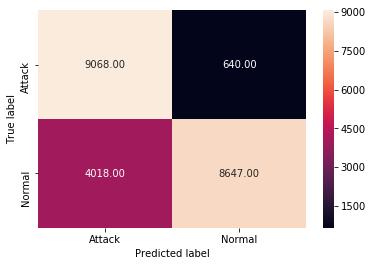

In [98]:
sn.heatmap(knn_cm, annot=True,  fmt='.2f', xticklabels = ["Attack", "Normal"] , yticklabels = ["Attack", "Normal"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [99]:
metrics.accuracy_score(test['AttackNew'], knn_clf.predict(  test[data_filterNew.columns.difference(['AttackNew','Split'])]) )

0.7918026192285343

In [100]:
AUC=metrics.roc_auc_score( test['AttackNew'], knn_clf.predict( test[data_filterNew.columns.difference(['AttackNew','Split'])]))
print("KNN model AUC: %.3f" % (AUC))

KNN model AUC: 0.808


## Naive Bayes

In [101]:
import sklearn.naive_bayes as nb

In [102]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import seaborn as sn

In [103]:
nb_clf = GaussianNB()
nb_clf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

GaussianNB(priors=None, var_smoothing=1e-09)

Text(0.5, 15.0, 'Predicted label')

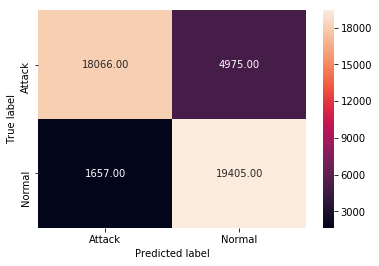

In [104]:
nb_cm = metrics.confusion_matrix( test_y,nb_clf.predict( test_X ) )
sn.heatmap(nb_cm, annot=True,  fmt='.2f', xticklabels = ["Attack", "Normal"] , yticklabels = ["Attack", "Normal"] )
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [105]:
metrics.accuracy_score(test['AttackNew'], nb_clf.predict( test[data_filterNew.columns.difference(['AttackNew','Split'])])) 

0.8167433960577481

In [107]:
auc_score = metrics.roc_auc_score( test['AttackNew'], nb_clf.predict(  test[data_filterNew.columns.difference(['AttackNew','Split'])]) ) 
auc_score 

0.8136536246474432

## Building Decision Tree Model

In [108]:
import sklearn.tree as dt

In [109]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

In [110]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree=clf_tree.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

In [111]:
clf_tree.predict_proba(train[data_filterNew.columns.difference(['AttackNew','Split'])])

array([[9.34195974e-01, 6.58040257e-02],
       [1.33699105e-01, 8.66300895e-01],
       [7.34248084e-04, 9.99265752e-01],
       ...,
       [9.99800551e-01, 1.99448796e-04],
       [7.34248084e-04, 9.99265752e-01],
       [9.34195974e-01, 6.58040257e-02]])

In [112]:
pd.DataFrame(clf_tree.predict_proba(train[data_filterNew.columns.difference(['AttackNew','Split'])])).head()

0         1
0  0.934196  0.065804
1  0.133699  0.866301
2  0.000734  0.999266
3  0.999801  0.000199
4  0.999801  0.000199

In [113]:
pd.DataFrame(clf_tree.predict_proba(train[data_filterNew.columns.difference(['AttackNew','Split'])]))[1]

0         0.065804
1         0.866301
2         0.999266
3         0.000199
4         0.000199
5         0.999266
6         0.999266
7         0.999266
8         0.999266
9         0.999266
10        0.999266
11        0.999266
12        0.000199
13        0.453569
14        0.999266
15        0.999266
16        0.000199
17        0.866301
18        0.000199
19        0.000199
20        0.999266
21        0.999266
22        0.000199
23        0.000199
24        0.999266
25        0.000199
26        0.999266
27        0.000199
28        0.000199
29        0.000199
            ...   
124607    0.065804
124608    0.000199
124609    0.000199
124610    0.999266
124611    0.866301
124612    0.999266
124613    0.065804
124614    0.866301
124615    0.000199
124616    0.212982
124617    0.999266
124618    0.000199
124619    0.065804
124620    0.065804
124621    0.000199
124622    0.999266
124623    0.000199
124624    0.000199
124625    0.000199
124626    0.065804
124627    0.000199
124628    0.

In [114]:
tree_train_pred = pd.DataFrame( { 'actual':  train['AttackNew'],
                            'predicted': clf_tree.predict( train[data_filterNew.columns.difference(['AttackNew','Split'])] ) } )

In [115]:
tree_train_pred.head(10)

actual  predicted
0       0          0
1       0          1
2       1          1
3       0          0
4       0          0
5       1          1
6       1          1
7       1          1
8       1          1
9       1          1

In [116]:
tree_test_pred = pd.DataFrame( { 'actual':  test['AttackNew'],
                            'predicted': clf_tree.predict( test[data_filterNew.columns.difference(['AttackNew','Split'])] ) } )

In [117]:
tree_test_pred.head(10)

actual  predicted
0       1          1
1       1          1
2       0          0
3       1          1
4       1          1
5       0          0
6       0          0
7       1          0
8       0          0
9       1          1

In [118]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9749673050538764

In [119]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8922361775354222

In [120]:
train_y.value_counts()

0    53849
1    49058
Name: AttackNew, dtype: int64

In [121]:
#How good the model is?
predict_proba_df = pd.DataFrame( clf_tree.predict_proba( train[data_filterNew.columns.difference(['AttackNew','Split'])] ) )

In [122]:
predict_proba_df.columns= ['Normal', 'Attack']

In [123]:
predict_proba_df.head()

Normal    Attack
0  0.934196  0.065804
1  0.133699  0.866301
2  0.000734  0.999266
3  0.999801  0.000199
4  0.999801  0.000199

In [124]:
metrics.roc_auc_score(train['AttackNew'],predict_proba_df.Attack )

0.9956115308639846

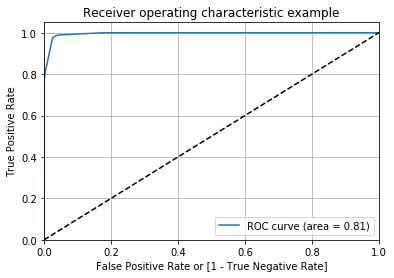

In [125]:
# Finding the optimal cutoff probability
fpr, tpr, thresholds = metrics.roc_curve( train['AttackNew'],
                                     predict_proba_df.Attack,
                                     drop_intermediate = False )

plt.figure(figsize=(6, 4))
plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Fine Tuning the parameters


In [126]:
param_grid = {'max_depth': np.arange(8, 13),
             'max_features': np.arange(1,11)}

In [127]:
tree = GridSearchCV(DecisionTreeClassifier(), param_grid, cv = 5)
tree.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 8,  9, 10, 11, 12]), 'max_features': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [128]:
tree.best_score_

0.9948169484182064

In [129]:
tree.best_estimator_

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [130]:
tree.best_params_

{'max_depth': 12, 'max_features': 10}

In [131]:
train_pred = tree.predict(train[data_filterNew.columns.difference(['AttackNew','Split'])])

In [132]:
print(metrics.classification_report( train['AttackNew'], train_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     67182
           1       1.00      1.00      1.00     57455

   micro avg       1.00      1.00      1.00    124637
   macro avg       1.00      1.00      1.00    124637
weighted avg       1.00      1.00      1.00    124637



In [133]:
test_pred = tree.predict(test[data_filterNew.columns.difference(['AttackNew','Split'])])

In [134]:
print(metrics.classification_report(test['AttackNew'], test_pred))

              precision    recall  f1-score   support

           0       0.70      0.97      0.81      9708
           1       0.96      0.68      0.80     12665

   micro avg       0.80      0.80      0.80     22373
   macro avg       0.83      0.82      0.80     22373
weighted avg       0.85      0.80      0.80     22373



### Building Final Decision Tree Model

In [135]:
clf_tree = DecisionTreeClassifier( max_depth = 12, max_features=10)
clf_tree.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=12,
            max_features=10, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [136]:
#Feature Importance
list(zip(train[data_filterNew.columns.difference(['AttackNew','Split'])].columns,clf_tree.feature_importances_ ))

[('Count', 0.12098657918385877),
 ('Diff_srv_rate', 0.011754306034608253),
 ('Dst_bytes', 0.6700753303740143),
 ('Dst_host_count', 0.014611689312015784),
 ('Dst_host_diff_srv_rate', 0.018617457881304224),
 ('Last_flag', 0.12992994557859844),
 ('Logged_inLoginStatus', 0.0076369092458209095),
 ('Service_http', 0.0064145371465183145),
 ('Service_private', 0.01945316595619395),
 ('Srv_diff_host_rate', 0.0005200792870669998)]

In [137]:
tree_test_pred = pd.DataFrame( { 'actual':  test['AttackNew'],
                            'predicted': clf_tree.predict( test[data_filterNew.columns.difference(['AttackNew','Split'])] ) } )

In [138]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.8056586063558754

### Ensemble learning

In [139]:
import sklearn.ensemble as en

In [140]:
dir(en)

['AdaBoostClassifier',
 'AdaBoostRegressor',
 'BaggingClassifier',
 'BaggingRegressor',
 'BaseEnsemble',
 'ExtraTreesClassifier',
 'ExtraTreesRegressor',
 'GradientBoostingClassifier',
 'GradientBoostingRegressor',
 'IsolationForest',
 'RandomForestClassifier',
 'RandomForestRegressor',
 'RandomTreesEmbedding',
 'VotingClassifier',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_gradient_boosting',
 'bagging',
 'base',
 'forest',
 'gradient_boosting',
 'iforest',
 'partial_dependence',
 'voting_classifier',
 'weight_boosting']

Bagged decision trees (with B=10)


In [141]:
from sklearn.ensemble import BaggingClassifier

In [142]:
bagclm = BaggingClassifier(oob_score=True, n_estimators=100, verbose=True, n_jobs=-1)
bagclm.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:   18.0s remaining:   54.3s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:   18.4s finished


BaggingClassifier(base_estimator=None, bootstrap=True,
         bootstrap_features=False, max_features=1.0, max_samples=1.0,
         n_estimators=100, n_jobs=-1, oob_score=True, random_state=None,
         verbose=True, warm_start=False)

In [143]:
bagclm.predict(train[data_filterNew.columns.difference(['AttackNew','Split'])])

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.8s remaining:    2.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.8s finished


array([0, 0, 1, ..., 0, 1, 0], dtype=int64)

In [144]:
bagclm.oob_score_

0.9962611423574059

In [145]:
y_pred = pd.DataFrame( { 'actual':  test['AttackNew'],
                            'predicted': bagclm.predict( test[data_filterNew.columns.difference(['AttackNew','Split'])]) } )

[Parallel(n_jobs=8)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   2 out of   8 | elapsed:    0.1s remaining:    0.5s
[Parallel(n_jobs=8)]: Done   8 out of   8 | elapsed:    0.2s finished


In [146]:
bagclm.estimators_features_

[array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),


In [147]:
print(metrics.accuracy_score( y_pred.actual, y_pred.predicted ))
print(metrics.roc_auc_score( y_pred.actual, y_pred.predicted ))

0.8059267867518884
0.8251435480987593


In [148]:
pargrid_bagging = {'n_estimators': [50, 60, 70, 80, 90, 100]}

gscv_bagging = GridSearchCV(estimator=BaggingClassifier(), 
                        param_grid=pargrid_bagging, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [149]:
gscv_results = gscv_bagging.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  2.3min finished


In [150]:
gscv_results.best_params_

{'n_estimators': 60}

In [151]:
gscv_results.best_score_

0.9962370724584193

## BUILDING RANDOM FOREST MODEL

In [152]:
from sklearn.ensemble import RandomForestClassifier

In [153]:
pargrid_rf = {'n_estimators': [50, 60, 70, 80, 90, 100],
                  'max_features': [5,6,7,8,9,10]}


gscv_rf = GridSearchCV(estimator=RandomForestClassifier(), 
                        param_grid=pargrid_rf, 
                        cv=5,
                        verbose=True, n_jobs=-1)

gscv_results = gscv_rf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  9.6min finished


In [154]:
gscv_results.best_params_

{'max_features': 5, 'n_estimators': 70}

In [155]:
gscv_results.best_score_

0.9965178879465969

In [156]:
radm_clf = RandomForestClassifier(oob_score=True,n_estimators=70 , max_features=5, n_jobs=-1)
radm_clf.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=-1,
            oob_score=True, random_state=None, verbose=0, warm_start=False)

In [157]:
radm_clf.n_features_

10

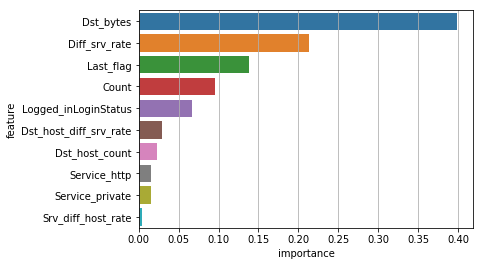

In [158]:
indices = np.argsort(radm_clf.feature_importances_)[::-1]
feature_rank = pd.DataFrame( columns = ['rank', 'feature', 'importance'] )
for f in range(train_X.shape[1]):
  feature_rank.loc[f] = [f+1,
                         train_X.columns[indices[f]],
                         radm_clf.feature_importances_[indices[f]]]
sn.barplot( y = 'feature', x = 'importance', data = feature_rank )

Boosting

Ada Boosting


In [159]:
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier

In [160]:
pargrid_ada = {'n_estimators': [50,70,90,100, 200],
               'learning_rate': [10 ** x for x in range(-3, 1)]}

In [161]:
gscv_ada = GridSearchCV(estimator=AdaBoostClassifier(), 
                        param_grid=pargrid_ada, 
                        cv=5,
                        verbose=True, n_jobs=-1)

In [162]:
gscv_ada.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  4.6min finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=50, random_state=None),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'n_estimators': [50, 70, 90, 100, 200], 'learning_rate': [0.001, 0.01, 0.1, 1]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=True)

In [163]:
gscv_ada.best_params_

{'learning_rate': 1, 'n_estimators': 200}

In [164]:
clf_ada = gscv_ada.best_estimator_

In [165]:
gscv_ada.best_score_

0.9834720026958287

In [166]:
ad=AdaBoostClassifier(learning_rate = 1, n_estimators=200)
ad.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
          n_estimators=200, random_state=None)

In [167]:
from sklearn.model_selection import cross_val_score

In [168]:
print(pd.Series(cross_val_score(clf_ada, train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'], cv=10)))

print(pd.Series(cross_val_score(clf_ada, test[data_filterNew.columns.difference(['AttackNew','Split'])], test['AttackNew'], cv=10)).describe()[['min', 'mean', 'max']])

0    0.984436
1    0.981067
2    0.981868
3    0.984435
4    0.983793
5    0.984434
6    0.984193
7    0.984193
8    0.982508
9    0.984354
dtype: float64
min     0.948592
mean    0.957046
max     0.964238
dtype: float64


## SVM Modelling

In [98]:
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [99]:
pca = PCA(n_components=6, whiten=True, random_state=42)
svc = SVC(kernel='rbf', class_weight='balanced')
model = make_pipeline(pca, svc)

In [ ]:
param_grid = {'svc__C': [1, 5, 10, 50],
              'svc__gamma': [0.0001, 0.0005, 0.001, 0.005]}
grid = GridSearchCV(model, param_grid, cv=5)

gresult = grid.fit(train[data_filterNew.columns.difference(['AttackNew','Split'])], train['AttackNew'])
print(gresult.best_params_)

# Multinomial Classification

In [24]:
data_cat_MN = data[cat_var_names]

In [25]:
for c_feature in categorical_features:
    data_cat_MN = create_dummies( data_cat_MN, c_feature )

In [26]:
data_cat_MN['Attack'].unique()

array(['normal', 'neptune', 'warezclient', 'ipsweep', 'portsweep',
       'teardrop', 'nmap', 'satan', 'smurf', 'pod', 'back',
       'guess_passwd', 'ftp_write', 'multihop', 'rootkit',
       'buffer_overflow', 'imap', 'warezmaster', 'phf', 'land',
       'loadmodule', 'spy', 'perl', 'saint', 'mscan', 'apache2',
       'snmpgetattack', 'processtable', 'httptunnel', 'ps', 'snmpguess',
       'mailbomb', 'named', 'sendmail', 'xterm', 'worm', 'xlock',
       'xsnoop', 'sqlattack', 'udpstorm'], dtype=object)

In [27]:
#DoS
data_cat_MN.replace(
    to_replace=['back','land','neptune','pod','smurf','teardrop','apache2','udpstorm','processtable','worm','mailbomb'],
    value=1,
    inplace=True
)

In [28]:
#Probe
data_cat_MN.replace(
    to_replace=['satan','ipsweep','nmap','portsweep','mscan','saint'],
    value=2,
    inplace=True
)

In [29]:
#R2L
data_cat_MN.replace(
    to_replace=['guess_passwd','ftp_write','imap','phf','multihop','warezmaster','warezclient','spy','xlock','xsnoop','snmpguess','snmpgetattack','httptunnel','sendmail','named'],
    value=3,
    inplace=True
)

In [30]:
#U2R
data_cat_MN.replace(
    to_replace=['buffer_overflow','loadmodule','rootkit','perl','sqlattack','xterm','ps'],
    value=4,
    inplace=True
)

In [31]:
data_cat_MN.replace(
    to_replace=['normal'],
    value=0,
    inplace=True
)

In [32]:
data_cat_MN['Attack'].unique()

array([0, 1, 3, 2, 4], dtype=int64)

In [33]:
data_new_MN = pd.concat([data_num, data_cat_MN], axis=1)
data_new_MN.head()

Duration  Src_bytes  Dst_bytes  Hot  Logged_inLoginStatus  Num_compromised  \
0       0.0      491.0        0.0  0.0                   0.0              0.0   
1       0.0      146.0        0.0  0.0                   0.0              0.0   
2       0.0        0.0        0.0  0.0                   0.0              0.0   
3       0.0      232.0     8153.0  0.0                   1.0              0.0   
4       0.0      199.0      420.0  0.0                   1.0              0.0   

   Count  Srv_count  Same_srv_rate  Diff_srv_rate   ...     Flag_REJ  \
0    2.0        2.0           1.00           0.00   ...            0   
1   13.0        1.0           0.08           0.15   ...            0   
2  123.0        6.0           0.05           0.07   ...            0   
3    5.0        5.0           1.00           0.00   ...            0   
4   30.0       32.0           1.00           0.00   ...            0   

   Flag_RSTO  Flag_RSTOS0  Flag_RSTR  Flag_S0  Flag_S1  Flag_S2  Flag_S3  \
0          0            0          0        0        0        0        0   
1          0            0          0        0        0        0        0   
2          0            0          0        1        0        0        0   
3          0            0          0        0        0        0        0   
4          0            0          0        0        0        0        0   

   Flag_SF  Flag_SH  
0        1        0  
1        1        0  
2        0        0  
3        1        0  
4        1        0  

[5 rows x 103 columns]

In [67]:
pandas_profiling.ProfileReport(data_new_MN)

## Variable Reduction using VIF values


In [40]:
features_MN = "+".join(data_new_MN.columns.difference(['Attack','Split']))

In [41]:
features_MN

'Count+Diff_srv_rate+Dst_bytes+Dst_host_count+Dst_host_diff_srv_rate+Dst_host_rerror_rate+Dst_host_same_src_port_rate+Dst_host_same_srv_rate+Dst_host_serror_rate+Dst_host_srv_count+Dst_host_srv_diff_host_rate+Duration+Flag_REJ+Flag_RSTO+Flag_RSTOS0+Flag_RSTR+Flag_S0+Flag_S1+Flag_S2+Flag_S3+Flag_SF+Flag_SH+Hot+Last_flag+Logged_inLoginStatus+Num_compromised+Protocol_type_tcp+Protocol_type_udp+Same_srv_rate+Service_X11+Service_Z39_50+Service_aol+Service_auth+Service_bgp+Service_courier+Service_csnet_ns+Service_ctf+Service_daytime+Service_discard+Service_domain+Service_domain_u+Service_echo+Service_eco_i+Service_ecr_i+Service_efs+Service_exec+Service_finger+Service_ftp+Service_ftp_data+Service_gopher+Service_harvest+Service_hostnames+Service_http+Service_http_2784+Service_http_443+Service_http_8001+Service_imap4+Service_iso_tsap+Service_klogin+Service_kshell+Service_ldap+Service_link+Service_login+Service_mtp+Service_name+Service_netbios_dgm+Service_netbios_ns+Service_netbios_ssn+Service_n

In [42]:
a,b = dmatrices(formula_like='Attack ~ '+ features_MN, data = data_new_MN, return_type='dataframe')

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(b.values, i) for i in range(b.shape[1])]
vif["features"] = b.columns

vif

VIF Factor                     features
0      0.000000                    Intercept
1      5.964523                        Count
2      2.403749                Diff_srv_rate
3      1.421897                    Dst_bytes
4      2.399610               Dst_host_count
5      3.333165       Dst_host_diff_srv_rate
6      7.979397         Dst_host_rerror_rate
7      3.369869  Dst_host_same_src_port_rate
8     13.786990       Dst_host_same_srv_rate
9     24.898079         Dst_host_serror_rate
10    10.123774           Dst_host_srv_count
11     3.203881  Dst_host_srv_diff_host_rate
12     1.600089                     Duration
13   277.689207                     Flag_REJ
14    48.035602                    Flag_RSTO
15     3.135907                  Flag_RSTOS0
16    62.034655                    Flag_RSTR
17   584.895207                      Flag_S0
18     8.850194                      Flag_S1
19     3.905672                      Flag_S2
20     7.068396                      Flag_S3
21   726.380596                      Flag_SF
22     8.166403                      Flag_SH
23     3.528937                          Hot
24     1.887116                    Last_flag
25    11.019325         Logged_inLoginStatus
26     2.391797              Num_compromised
27          inf            Protocol_type_tcp
28          inf            Protocol_type_udp
29    13.377881                Same_srv_rate
..          ...                          ...
72     1.996898                Service_ntp_u
73    28.978259                Service_other
74     1.132298              Service_pm_dump
75     1.502361                Service_pop_2
76     8.083666                Service_pop_3
77     1.442607              Service_printer
78   121.074857              Service_private
79          inf                Service_red_i
80     1.506387           Service_remote_job
81     1.517288                  Service_rje
82     1.448354                Service_shell
83    44.338756                 Service_smtp
84     2.451513              Service_sql_net
85     2.855310                  Service_ssh
86     3.964381               Service_sunrpc
87     4.149062               Service_supdup
88     3.808563               Service_systat
89    22.141596               Service_telnet
90     1.024094               Service_tftp_u
91          inf                Service_tim_i
92     4.792762                 Service_time
93          inf                Service_urh_i
94          inf                Service_urp_i
95     5.588171                 Service_uucp
96     5.054178            Service_uucp_path
97     4.643529                Service_vmnet
98     5.040124                Service_whois
99     1.945374                    Src_bytes
100    5.017197                    Srv_count
101    1.601351           Srv_diff_host_rate

[102 rows x 2 columns]

In [46]:
vif = vif[(vif['VIF Factor'] < 5) & (vif['features']!='Intercept')]

In [47]:
data_MN_New = data_new_MN[vif['features']]

In [49]:
data_MN_New['AttackNew'] = data_new_MN['Attack']

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [50]:
data_MN_New['Split'] = data_new_MN['Split']

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [51]:
#Train and Test split
train = data_MN_New.loc[data_MN_New['Split']=='Train']
test = data_MN_New.loc[data_MN_New['Split']=='Test']

## Decision Tree model

In [53]:
import sklearn.tree as dt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export

In [54]:
clf_tree = DecisionTreeClassifier( max_depth = 4 )
clf_tree=clf_tree.fit(train[data_MN_New.columns.difference(['AttackNew','Split'])], train['AttackNew'])

In [55]:
clf_tree.predict_proba(train[data_MN_New.columns.difference(['AttackNew','Split'])])

array([[9.47051065e-01, 5.29489354e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00],
       [5.45641730e-01, 1.22855182e-01, 1.15991764e-01, 2.15511325e-01,
        0.00000000e+00],
       [2.85426048e-03, 9.94906621e-01, 2.23911813e-03, 0.00000000e+00,
        0.00000000e+00],
       ...,
       [9.99963543e-01, 0.00000000e+00, 0.00000000e+00, 3.64570991e-05,
        0.00000000e+00],
       [2.85426048e-03, 9.94906621e-01, 2.23911813e-03, 0.00000000e+00,
        0.00000000e+00],
       [9.47051065e-01, 5.29489354e-02, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00]])

In [56]:
tree_train_pred = pd.DataFrame( { 'actual':  train['AttackNew'],
                            'predicted': clf_tree.predict( train[data_MN_New.columns.difference(['AttackNew','Split'])] ) } )

In [57]:
tree_test_pred = pd.DataFrame( { 'actual':  test['AttackNew'],
                            'predicted': clf_tree.predict( test[data_MN_New.columns.difference(['AttackNew','Split'])] ) } )

In [58]:
metrics.accuracy_score( tree_train_pred.actual, tree_train_pred.predicted )

0.9619839171886039

In [59]:
metrics.accuracy_score( tree_test_pred.actual, tree_test_pred.predicted )

0.7620209368346345

## Building logistic Regression


In [60]:
lr_clf = LogisticRegression(random_state=0, solver='lbfgs',multi_class='multinomial').fit(train[data_MN_New.columns.difference(['AttackNew','Split'])], train['AttackNew'])

C:\Users\sachdev.rakesh\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [61]:
lr_clf.predict(train[data_MN_New.columns.difference(['AttackNew','Split'])])

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

In [62]:
lr_clf.predict_proba(train[data_MN_New.columns.difference(['AttackNew','Split'])])

array([[5.59784593e-01, 3.29974377e-01, 1.10240202e-01, 8.28060254e-07,
        7.21868155e-11],
       [2.58493162e-01, 6.77397605e-01, 6.41092336e-02, 1.51817973e-10,
        1.10422517e-12],
       [3.40192409e-01, 5.87009185e-01, 7.27984060e-02, 1.42857992e-10,
        1.12716752e-11],
       ...,
       [3.61412528e-01, 6.38047510e-01, 5.39961696e-04, 1.29861834e-10,
        3.37981325e-27],
       [3.62045561e-01, 5.64564890e-01, 7.33895488e-02, 1.39915240e-10,
        1.11208505e-11],
       [3.83554448e-01, 5.48004679e-01, 6.84408729e-02, 1.36853487e-10,
        9.59619241e-13]])

In [63]:
lr_clf.score(train[data_MN_New.columns.difference(['AttackNew','Split'])], train['AttackNew'])

0.7507243615695427

## K-Nearest Neighbors


In [65]:
from sklearn.neighbors import KNeighborsClassifier

In [66]:
k_neigh = KNeighborsClassifier(n_neighbors=3)
k_neigh.fit(train[data_MN_New.columns.difference(['AttackNew','Split'])], train['AttackNew'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='uniform')

In [67]:
k_neigh.score(train[data_MN_New.columns.difference(['AttackNew','Split'])], train['AttackNew']) 

0.9958880077476919